Missing values:
 Name      0
Age       2
Gender    0
Salary    1
City      0
dtype: int64


<ipython-input-1-0965f52d9047>:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())  # Fill missing values with mean


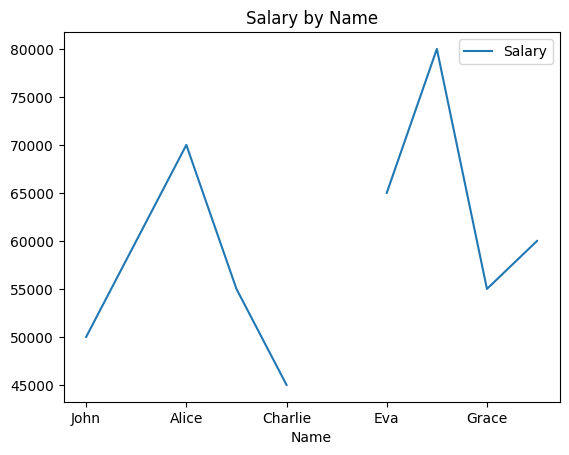

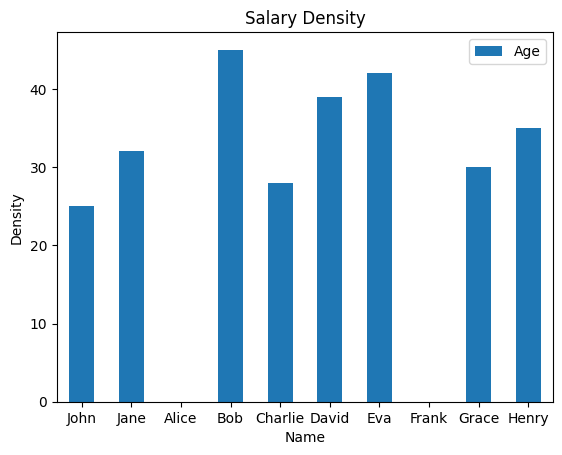

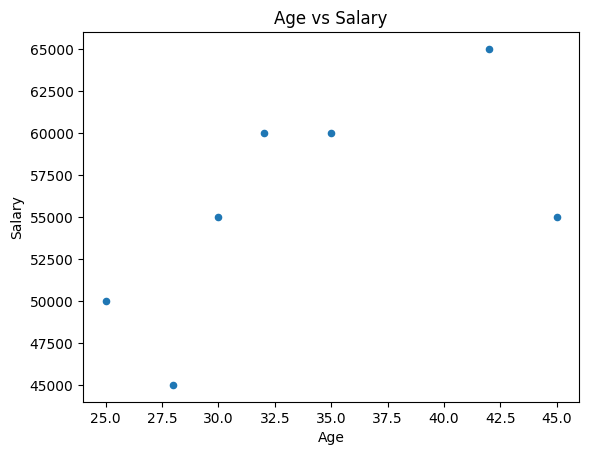

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create sample data satisfying constraints
data = {
    'Name': ['John', 'Jane', 'Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'Age': [25, 32, np.nan, 45, 28, 39, 42, np.nan, 30, 35],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Salary': [50000, 60000, 70000, 55000, 45000, np.nan, 65000, 80000, 55000, 60000],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney', 'Berlin', 'London', 'Paris', 'Tokyo', 'Sydney']
}

# Create DataFrame from the sample data
df = pd.DataFrame(data)

# (a) Handle missing data by detecting and dropping/filling missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df_dropped = df.dropna()  # Drop rows with missing values
df_filled = df.fillna(df.mean())  # Fill missing values with mean

# (b) Transform data using apply() and map() method
df['Salary_Transformed'] = df['Salary'].apply(lambda x: x + 1000)  # Example of using apply() method
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender_Mapped'] = df['Gender'].map(gender_mapping)  # Example of using map() method

# (c) Detect and filter outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
filtered_df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# (d) Perform Vectorized String operations on Pandas Series
df['City_Lowercase'] = df['City'].str.lower()
df['City_Length'] = df['City'].str.len()

# (e) Visualize data using Line Plots, Bar Plots, Histograms, Density Plots, and Scatter Plots
df.plot(kind='line', x='Name', y='Salary', title='Salary by Name')
df.plot(kind='bar', x='Name', y='Age', title='Age by Name')
df['Age'].plot(kind='hist', title='Age Distribution')
df['Salary'].plot(kind='density', title='Salary Density')
df.plot(kind='scatter', x='Age', y='Salary', title='Age vs Salary')

plt.show()
